In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn import TransformerDecoder, TransformerDecoderLayer
import torch.optim as optim
import tensorflow as tf
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
# Lấy data từ drive
IMG_SIZE = (850, 150)
DATASET_PATH = "C:/Users/ADMIN/Documents/data_line/data-line/data-line/data"
label_Path = "C:/Users/ADMIN/Documents/data_line/data-line/data-line/label.txt"

In [3]:
def preprocess_image(image_path, IMG_SIZE):
    # Mở, chuyển grayscale và resize ảnh
    img = Image.open(image_path).convert("L").resize(IMG_SIZE, Image.Resampling.LANCZOS)

    # Chuyển thành array và xử lý
    img = np.array(img)
    img = cv2.bilateralFilter(img, 5, 50, 50)
    img = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

    # Tăng độ nét
    blurred = cv2.GaussianBlur(img, (0,0), 3)
    img = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

    # Chuẩn hóa và chuyển thành tensor
    img = img.astype(np.float32) / 255.0
    return transforms.ToTensor()(img).repeat(3, 1, 1)

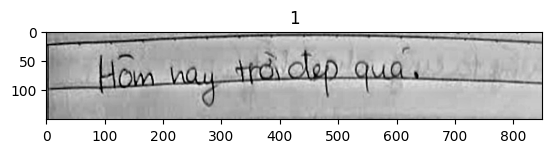

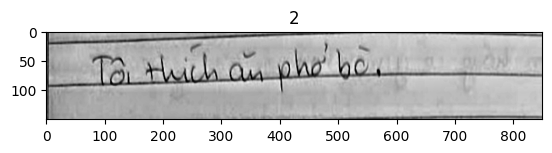

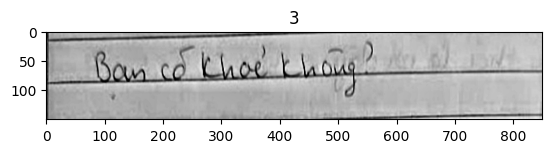

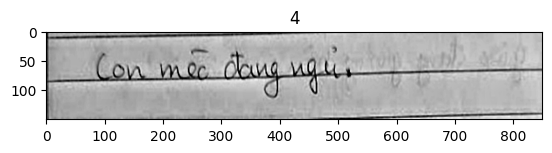

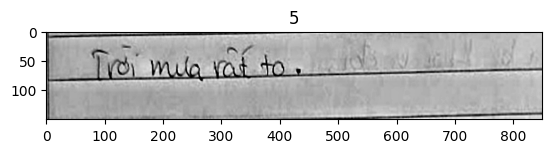

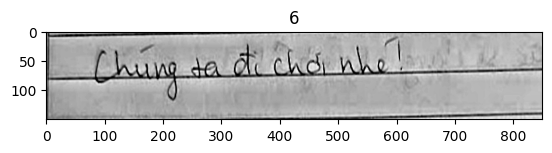

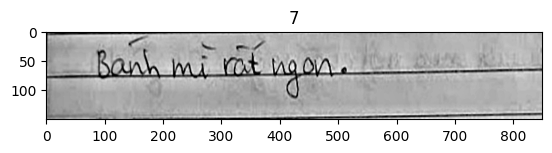

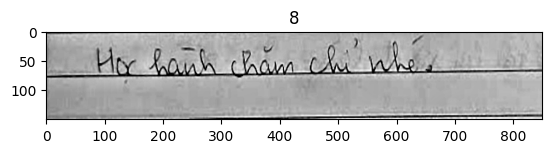

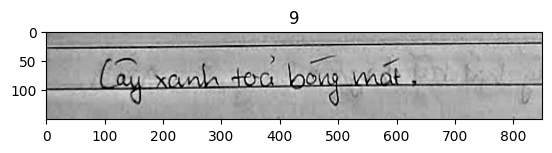

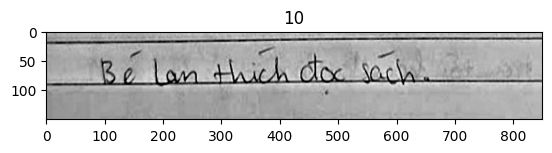

In [4]:
import matplotlib.pyplot as plt

count = 0  # Biến đếm số lượng ảnh hiển thị
max_images = 10  # Số lượng ảnh muốn hiển thị

# Lấy danh sách tệp và lọc ra những tệp có tên là số
file_list = [f for f in os.listdir(DATASET_PATH) if f.split('.')[0].isdigit()]
file_list = sorted(file_list, key=lambda x: int(x.split('.')[0]))  # Sắp xếp theo số thứ tự

for filename in file_list:
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(DATASET_PATH, filename)
        
        # Xử lý ảnh
        preprocessed_image = preprocess_image(image_path, IMG_SIZE)
        text = filename.split('.')[0]  # Lấy số thứ tự từ tên file
        
        # Chuyển ảnh tensor sang numpy để hiển thị
        image_np = preprocessed_image.permute(1, 2, 0).numpy()
        
        plt.imshow(image_np, cmap='gray')
        plt.title(text)
        plt.show()
        
        count += 1
        if count >= max_images:  # Dừng sau khi hiển thị đủ số lượng ảnh
            break